### NYC Temp Predictions

Gabriel Richards

See more information in the Readme:
https://github.com/gjrich/datafun-07-applied/blob/main/README.md

Step 0 - install necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Part 1- Chart a Straight Line

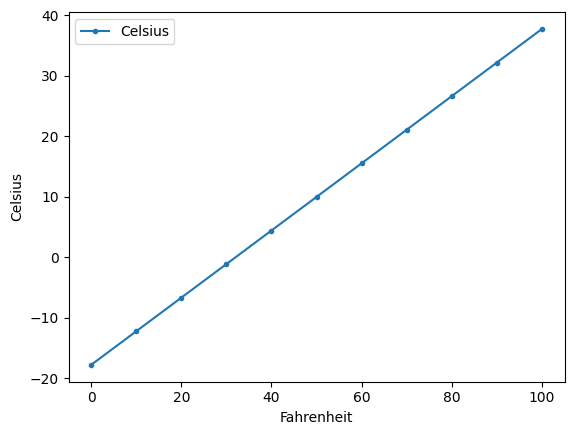

In [3]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# import pandas as pd 
# already done

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Part 2 - Prediction

### Section 1 - Data Acquisition
Loading the Average High Temps into a DataFrame

In [4]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')



### Section 2 - Data Inspection

In [5]:
nyc_df.head()

nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Cleaning the Data

In [6]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [7]:
nyc_df.Date.dtype

dtype('int64')

In [8]:
nyc_df.Date = nyc_df.Date.floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
Calculating Basic Descriptive Statistics for the Dataset

In [9]:
pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Forecasting Future January 

In [10]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

linear_regression.slope

np.float64(0.014771361132966163)

In [11]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
We can use the values above with a simple linear regression equation for a straight line to predict the ave3rage Jan temperature in NYC for a given year. Numbers below in Fahrenheit.

In [12]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

The predicted high temp for Jan 2019 was 38.51 degrees.

In [13]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

The predicted high temp for Jan 1890 was 36.61 degrees.

In [14]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

The predicted high temp for Jan 2024 was 38.59 degrees.

### Section 7 - Visualizations

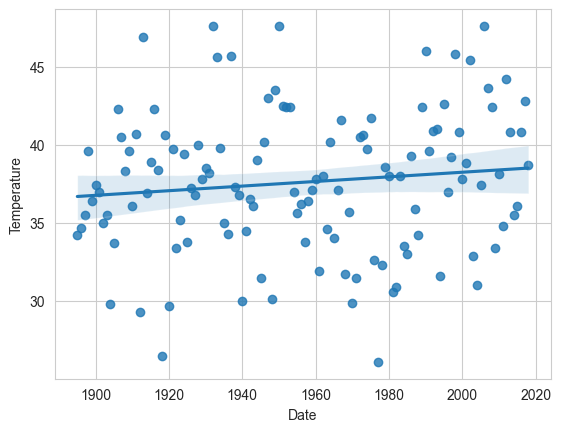

In [15]:
sns.set_style('whitegrid')
axes=sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)



(10.0, 70.0)

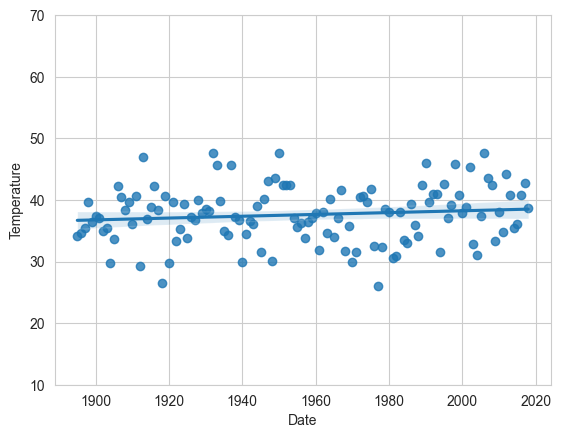

In [16]:
axes=sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

This moves the data points to show as between 10 and 70 degrees Fahrenheit.

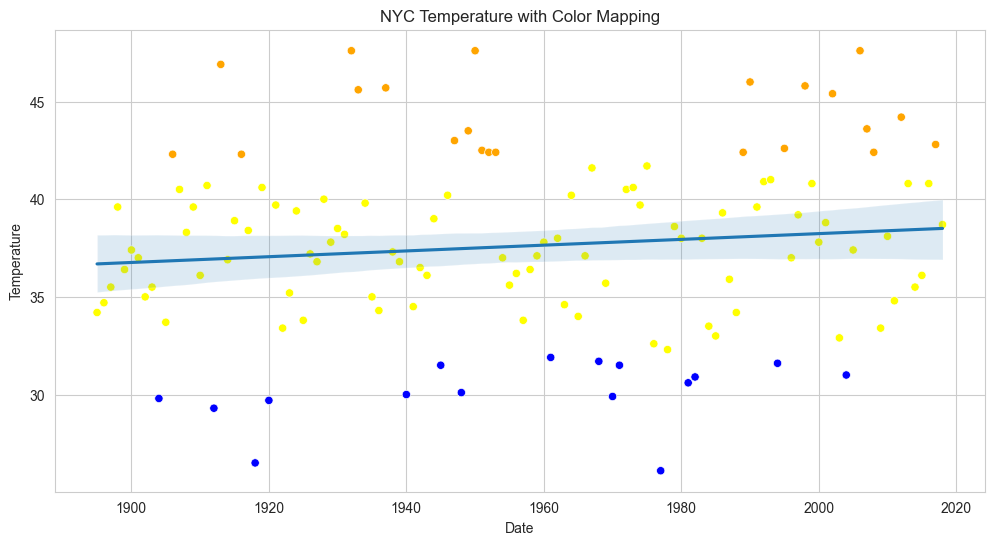

In [17]:
# Set the style
sns.set_style('whitegrid')

# Create a color mapping based on temperature
conditions = [
    (nyc_df.Temperature < 32),
    (nyc_df.Temperature >= 32) & (nyc_df.Temperature <= 42),
    (nyc_df.Temperature > 42)
]
colors = ['yellow', 'blue', 'orange']

# Create a new column in the DataFrame for colors based on conditions
nyc_df['Color'] = 'orange'  # Default color
nyc_df.loc[conditions[0], 'Color'] = colors[0]  # Blue for < 32
nyc_df.loc[conditions[1], 'Color'] = colors[1]  # Yellow for 32-42
nyc_df.loc[conditions[2], 'Color'] = colors[2]  # Orange for > 42

# Plot using scatterplot for colored points
plt.figure(figsize=(12, 6))
axes = sns.scatterplot(x=nyc_df.Date, y=nyc_df.Temperature, hue=nyc_df.Color, palette=colors, legend=False)

# Optionally, you can add a regression line if needed
sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter=False, ax=axes)

plt.title('NYC Temperature with Color Mapping')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

The plot was further altered to show all points below 32 as blue, above 42 as orange, and everything in the center as yellow.

### Part 3 - Prediction

### Section 1 - Build the Model

### Section 2 - Test the Model

### Section 3 - Predict 

### Section 4 - Vizualizations

### Part 4 - Add Insights